In [2]:
#from nytimesarticle import articleAPI
#api = articleAPI('a0HA3uBISDkGyvUGR3FeoAGybtDVPPM5')

In [4]:
#articles = api.search( q = 'immigration', 
#     begin_date = 20120101, end_date =20120201 )

# create TIDF on an example call from R

https://towardsdatascience.com/latent-semantic-analysis-sentiment-classification-with-python-5f657346f6a3

In [1]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk
import gensim 
from gensim.models import Word2Vec 
from gensim.models.wrappers import FastText 

from gensim.models import FastText


from PyDictionary import PyDictionary # utilize this library in order to do webscrapping
from IPython.display import clear_output, display

from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
import nltk 
import pandas as pd
from pandas import *
import pandasql
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 
import re
from sklearn.feature_extraction import text
from builtins import input
from statistics import mean



from statistics import mode, StatisticsError

import functools


import re
from sklearn.feature_extraction import text
global cases

from pandas import ExcelWriter
import xlsxwriter

import xlwt
from xlwt.Workbook import *


from tqdm import tqdm_notebook
from nltk.corpus import wordnet

from statistics import *

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import numpy as np
import pandas as pd
import re

In [24]:
df = pd.read_csv('Sentiment-Analysis-NYT-Articlesdir\\allNYTSearch1980to2020_no_duplicates.txt', sep = "\t", encoding = 'iso-8859-1')

Getting rid off duplicate id's

In [32]:
#df['response.docs._id'].duplicated().any()

#df[df.duplicated(['response.docs._id'])]

df.drop_duplicates(subset ="response.docs._id", 
                     keep = False, inplace = True) 

In [33]:
df

,status,copyright,response.docs.abstract,response.docs.web_url,response.docs.snippet,response.docs.lead_paragraph,response.docs.print_section,response.docs.print_page,response.docs.source,response.docs.pub_date,...,response.docs.headline.print_headline,response.docs.headline.name,response.docs.headline.seo,response.docs.headline.sub,response.docs.byline.original,response.docs.byline.organization,response.meta.hits,response.meta.offset,response.meta.time,response.docs.subsection_name
1,OK,Copyright (c) 2020 The New York Times Company....,Federal officials said today that the Govern...,https://www.nytimes.com/1981/01/03/us/us-may-a...,NaN,Federal officials said today that the Governme...,1,10,The New York Times,1981-01-03T05:00:00+0000,...,U.S. MAY APPEAL RULING FORBIDDING INDEFINITE D...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
2,OK,Copyright (c) 2020 The New York Times Company....,By Michael Wright and Caroline Rand Herron U...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,By Michael Wright and Caroline Rand Herron Unt...,4,2,The New York Times,1981-01-04T05:00:00+0000,...,THE NATION; Demand for Action On Jailed Refugee,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
3,OK,Copyright (c) 2020 The New York Times Company....,With ''descents'' rising and ''ascents'' dec...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,With ''descents'' rising and ''ascents'' decli...,4,4,The New York Times,1981-01-04T05:00:00+0000,...,ISRAELI EMIGRATION INSPIRES ANGER AND FEAR,NaN,NaN,NaN,By Henry Kamm,NaN,986,0.0,244.0,NaN
4,OK,Copyright (c) 2020 The New York Times Company....,Bruce Feirstein is a writer living in New Yo...,https://www.nytimes.com/1981/01/04/magazine/th...,NaN,Bruce Feirstein is a writer living in New York...,6,26,The New York Times,1981-01-04T05:00:00+0000,...,THE OLD STARGAZER'S ALMANAC FOR 1981,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
5,OK,Copyright (c) 2020 The New York Times Company....,The General Accounting Office says there app...,https://www.nytimes.com/1981/01/04/us/bogus-so...,NaN,The General Accounting Office says there appea...,1,20,The New York Times,1981-01-04T05:00:00+0000,...,BOGUS SOCIAL SECURITY CARDS FOUND INCREASING B...,NaN,NaN,NaN,"By Robert Pear, Special To the New York Times",NaN,986,0.0,244.0,NaN
6,OK,Copyright (c) 2020 The New York Times Company....,By Michael Wright and Caroline Rand Herron T...,https://www.nytimes.com/1981/01/04/weekinrevie...,NaN,By Michael Wright and Caroline Rand Herron The...,4,2,The New York Times,1981-01-04T05:00:00+0000,...,THE NATION; Back to the Old Teeming Shore,NaN,NaN,NaN,NaN,NaN,986,0.0,244.0,NaN
7,OK,Copyright (c) 2020 The New York Times Company....,"The financier Robert L. Vesco, who dropped o...",https://www.nytimes.com/1981/01/06/us/vesco-re...,NaN,"The financier Robert L. Vesco, who dropped out...",B,8,The New York Times,1981-01-06T05:00:00+0000,...,Vesco Returns to Nassau Home; VESCO RETURNS TO...,NaN,NaN,NaN,AP,AP,986,0.0,244.0,NaN
8,OK,Copyright (c) 2020 The New York Times Company....,After months of intense lobbying and interna...,https://www.nytimes.com/1981/01/07/us/identifi...,NaN,After months of intense lobbying and internal ...,B,5,The New York Times,1981-01-07T05:00:00+0000,...,IDENTIFICATION CARD IDEA SHELVED BY A U.S. PANEL,NaN,NaN,NaN,UPI,NaN,986,0.0,244.0,NaN
9,OK,Copyright (c) 2020 The New York Times Company....,A Federal immigration commission today retra...,https://www.nytimes.com/1981/01/08/us/around-t...,NaN,A Federal immigration commission today retract...,A,16,The New York Times,1981-01-08T05:00:00+0000,...,AROUND THE NATION; Immigration Panel Modifies ...,NaN,NaN,NaN,UPI,NaN,986,0.0,244.0,NaN
10,OK,Copyright (c) 2020 The New York Times Company....,Bahamian immigration officials who want to d...,https://www.nytimes.com/1981/01/08/us/bahamian...,NaN,Bahamian immigration officials who want to dep...,B,17,The New York Times,1981-01-08T05:00:00+0000,...,Bahamian Officials Order Vesco To Leave the Co...,NaN,N

Preprocess evertyhing in python and not R: migrating code

In [90]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 


def preprocess_regex(row):
    row=str(row)
    row = row.lower()
    row=row.replace('-'," ") 
    row=row.replace(','," ")
    row=row.replace('.'," ")
    row=row.replace('+'," ")
    row=row.replace('"'," ")
    row=row.replace("''","")
    row=row.replace("'","")
    row=row.replace(":","")
    row=row.replace("_","")
    cleanr = re.compile('<.*?>')  #this would replace 'random' in 'random words' but not in 'pseudorandom words'
    cleantext = re.sub(cleanr, '', row)
    line = re.sub('[!@#$]', '', cleantext)
    rem_num = re.sub('[0-9]+', '', line)
    #tokenizer = RegexpTokenizer(r'\w+')  #this yields lower counts of words
    tokens = nltk.tokenize.word_tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')] #if it appears more than two times get rid off the stopwords, change this
    return " ".join(filtered_words)


In [91]:
df['cleanText']=df['response.docs.lead_paragraph'].map(lambda s:preprocess_regex(s)) 

Tokenized_lead_paragraphs = df.apply(lambda row: nltk.word_tokenize(row['cleanText']), axis=1)

In [55]:
# def tokenizing_words_in_product_title(list_):    
#     pt_clean = list_.str.cat(sep=' ')
#     words = nltk.tokenize.word_tokenize(pt_clean)
#     word_dist = nltk.FreqDist(words)
#     top_N = len(words)

#     #creating a dataframe of these words plus id so later we can merge.
#     C_UW_F= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
#                     columns=['Word', 'Frequency'])
#     C_UW_F["id"] = C_UW_F.index + 1
#     return (C_UW_F)
# #C_UW_F



In [51]:
# U_words_corpus=tokenizing_words_in_product_title(df, 'cleanText')

#U_words_corpus


In [38]:
# list_query = U_words_corpus['Word'] #words and its meanings

# meanings_for_words_in_product_title = [] 
# for word in list_query: # Your word list
#     ss = wordnet.synsets(word)
#     if ss:
#         definition = ss[0].definition() 
#         meanings_for_words_in_product_title.append(definition)
#     else:
#         word = None
#         meanings_for_words_in_product_title.append(word)

In [56]:
#meanings_for_words_in_product_title

In [66]:
# df_unqiue_words = pd.DataFrame({'word':list_query, 'tag':meanings_for_words_in_product_title})

# df_unqiue_words['counts_of_words'] = U_words_corpus['Frequency']

# len(df_unqiue_words)

8709

# Senitment analysis with vader

Wehre is the lexicon based dicctionary?

https://github.com/cjhutto/vaderSentiment/blob/master/vaderSentiment/vader_lexicon.txt

In [92]:
df['cleanText'][1]

'michael wright caroline rand herron last week pedro rodriguez must wondered whether boat took wrong turn last aprils cuban refugee boatlift shortly arrived united states trundled federal penitentiary leavenworth kan'

In [93]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [94]:
def sentiment_analyzer_scores(sentence):
    scores = analyser.polarity_scores(sentence)
    #score = ("{:-<40} {}".format(sentence, str(string_words)))
    return scores

In [95]:
clean_text=list(df['cleanText'])

sentiment_scores = []
for i in range(len(clean_text)):
    sentiment_scores.append(sentiment_analyzer_scores(clean_text[i]))

In [188]:
df['sentiment_scores_vader'] = sentiment_scores

In [189]:
compound_scores = []
for i in range(len(sentiment_scores)):
    compound_scores.append(sentiment_scores[i]['compound'])
    
neg_scores = []
for i in range(len(sentiment_scores)):
    neg_scores.append(sentiment_scores[i]['neg'])

pos_scores = []
for i in range(len(sentiment_scores)):
    pos_scores.append(sentiment_scores[i]['pos'])


In [190]:
df['compound_scores_vader'] = compound_scores

df['negative_scores_vader'] = neg_scores

df['positive_scores_vader'] = pos_scores

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000134AA630>]],
      dtype=object)

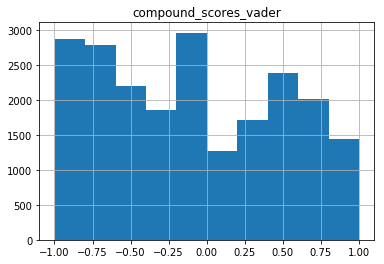

In [191]:
df.hist(column = 'compound_scores_vader')

In [178]:
#df[df['compound_scores']== 0.00]

In [179]:
import nltk
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.tokenize import word_tokenize, RegexpTokenizer


def get_word_sentiment(text):
    neg_word_list = []
    pos_word_list = []
    neu_word_list = []
    
    tokenized_text = nltk.word_tokenize(text)
    
    for word in tokenized_text:
        if (analyser.polarity_scores(word)['compound']) >= 0.05:
            pos_word_list.append(word)
        elif (analyser.polarity_scores(word)['compound']) <= -0.05:
            neg_word_list.append(word)
        else:
            neu_word_list.append(word)
    return {'Positive':pos_word_list,'Neutral': neu_word_list,'Negative':neg_word_list}
    #return pos_word_list,neu_word_list,neg_word_list


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pdgac\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pdgac\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [180]:
lists_sentiment_P_N_N = []
for i in range(len(df)):
    lists_sentiment_P_N_N.append(get_word_sentiment(clean_text[i]))

In [181]:
len(lists_sentiment_P_N_N)

21457

In [101]:
lists_sentiment_P_N_N[0]

{'Positive': [],
 'Neutral': ['federal',
  'officials',
  'said',
  'today',
  'government',
  'would',
  'probably',
  'appeal',
  'federal',
  'judges',
  'ruling',
  'cuban',
  'refugee',
  'unlawful',
  'said',
  'would',
  'also',
  'consider',
  'alternatives',
  'conditional',
  'release',
  'cubans',
  'held',
  'eventual',
  'return',
  'cuba'],
 'Negative': ['detention', 'prison']}

Neutral words extraction by lexicion vader

In [182]:
List_of_neutral_words_in_corpus = []
for d in lists_sentiment_P_N_N:
    List_of_neutral_words_in_corpus.append(d['Neutral'])
    
List_of_neutral_words_in_corpus

flat_list_neutral_words = [item for sublist in List_of_neutral_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_neutral_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_neutral_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])




In [183]:
len(df_neutral_words)

45642

Positve words extraction by lexicion vader

In [184]:

List_of_positive_words_in_corpus = []
for y in lists_sentiment_P_N_N:
    List_of_positive_words_in_corpus.append(y['Positive'])

flat_list_positive_words = [item for sublist in List_of_positive_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_positive_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_positive_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])

In [185]:
len(df_positive_words)

1353

In [186]:
List_of_negative_words_in_corpus = []
for y in lists_sentiment_P_N_N:
    List_of_negative_words_in_corpus.append(y['Negative'])

flat_list_negative_words = [item for sublist in List_of_negative_words_in_corpus for item in sublist]


word_dist = nltk.FreqDist(flat_list_negative_words)
top_N = len(word_dist)

    #creating a dataframe of these words plus id so later we can merge.
df_negative_words= pd.DataFrame(word_dist.most_common(top_N),  #C_UW_F = category unique word final
                    columns=['Word', 'Frequency'])

In [187]:
len(df_negative_words)

1750

# Sentiment Analysis with Textblob

In [192]:
from textblob import TextBlob

In [195]:
def sentiment_analyzer_scores_textblob(sentence):
    scores = TextBlob(sentence).sentiment.polarity
    #score = ("{:-<40} {}".format(sentence, str(string_words)))
    return scores

In [198]:
clean_text=list(df['cleanText'])

sentiment_scores_texblob = []
for i in range(len(clean_text)):
    sentiment_scores_texblob.append(sentiment_analyzer_scores_textblob(clean_text[i]))

In [200]:
df['sentiment_scores_textblob'] = sentiment_scores_texblob

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000214B8320>]],
      dtype=object)

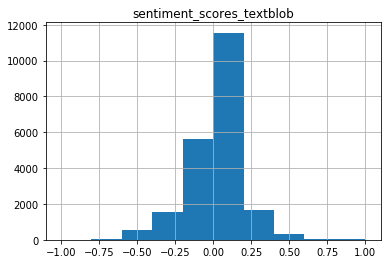

In [202]:
df.hist(column = 'sentiment_scores_textblob')

# TF-IDF

TF (Term Frequency) measures the frequency of a word in a document.

TF = (Number of time the word occurs in the text) / (Total number of words in text)

IDF (Inverse Document Frequency) measures the rank of the specific word for its relevancy within the text. Stop words which contain unnecessary information such as “a”, “into” and “and” carry less importance in spite of their occurrence.

IDF = (Total number of documents / Number of documents with word t in it)

Thus, the TF-IDF is the product of TF and IDF:

TF-IDF = TF * IDF

https://iyzico.engineering/how-to-calculate-tf-idf-term-frequency-inverse-document-frequency-from-the-beatles-biography-in-c4c3cd968296

In [137]:
cvec = CountVectorizer( min_df=1, ngram_range=(1,1))
sf = cvec.fit_transform(df['cleanText'])

In [138]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(sf)
weights = np.asarray(transformed_weights.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'Word': cvec.get_feature_names(), 'weight': weights})

In [143]:
weights_df.sort_values(by='weight', ascending=False)

,Word,weight
19479,immigration,2.266148e-02
19474,immigrants,1.875175e-02
27429,new,1.772585e-02
42402,united,1.720828e-02
35024,said,1.706893e-02
40958,today,1.550995e-02
33175,refugees,1.535389e-02
38478,states,1.520476e-02
19390,illegal,1.294987e-02
19472,immigrant,1.173352e-02


saving data that is cleaned and its removed of duplicates as well as adding words that are positive, negative and neutral by the lexicon vader

In [147]:
# with pd.ExcelWriter('NYT_data_1980_to_2020_V2.xlsx') as writer:
#     df.to_excel(writer, sheet_name = 'nyt_data', header = True )
#     df_positive_words.to_excel(writer, sheet_name='positive_words_by_vader', header = True)
#     df_negative_words.to_excel(writer, sheet_name='negative_words_by_vader', header = True)
#     df_neutral_words.to_excel(writer, sheet_name= 'neutral_words_by_vader', header = True)

# Word2vec models 

In [55]:
model_by_category = gensim.models.Word2Vec(Tokenized_lead_paragraphs, min_count = 10,  
                               window = 5, sg = 1) #CBOW method, the idea is that given a context, we want to know which word is most likely to appear in it

vocabulary = model_by_category.wv.vocab
#print(vocabulary)


sim_words = model_by_category.wv.most_similar('immigrant', topn = 10)
print(sim_words)

[('student', 0.561613917350769), ('restaurant', 0.548810601234436), ('youth', 0.5447171926498413), ('teenager', 0.5409802198410034), ('parents', 0.5188405513763428), ('engineer', 0.511468231678009), ('migrant', 0.5110702514648438), ('-year-old', 0.510973334312439), ('teenagers', 0.5099538564682007), ('mother', 0.5077539682388306)]


In [64]:
model_most_similar_words_lead_P = FastText(Tokenized_lead_paragraphs, size=100, window=5, min_count=5)

In [65]:
model_most_similar_words_lead_P.wv.most_similar("migration", topn = 50)

[('immigration', 0.9999980926513672),
 ('generation', 0.9999960660934448),
 ('nation', 0.9999956488609314),
 ('separation', 0.9999954700469971),
 ('deportation', 0.9999953508377075),
 ('coalition', 0.9999949932098389),
 ('detention', 0.9999946355819702),
 ('population', 0.9999945163726807),
 ('destination', 0.9999943971633911),
 ('station', 0.999994158744812),
 ('action', 0.9999940395355225),
 ('attention', 0.9999939203262329),
 ('edition', 0.9999937415122986),
 ('nomination', 0.9999936819076538),
 ('situation', 0.9999935626983643),
 ('nations', 0.9999933838844299),
 ('deportations', 0.9999932646751404),
 ('investigation', 0.9999927878379822),
 ('legislation', 0.9999927282333374),
 ('nationwide', 0.9999927282333374),
 ('question', 0.9999924302101135),
 ('election', 0.9999923706054688),
 ('administration', 0.9999923706054688),
 ('conditions', 0.9999923706054688),
 ('national', 0.9999922513961792),
 ('organization', 0.9999922513961792),
 ('opposition', 0.9999921321868896),
 ('protection'